### Average

In [1]:
def average(numbers):
    return sum(numbers) / len(numbers)


print(average([1, 2, 3, 4, 5, 6]))
print(average([7, 7, 7]))
print(average([9.5, 10.5]))

3.5
7.0
10.0


In [2]:
from statistics import mean


print(mean([1, 2, 3, 4, 5, 6]))
print(mean([7, 7, 7]))
print(mean([9.5, 10.5]))

3.5
7
10.0


**Problem.** HR management of a company has decided to optimize the average performance of employees by applying the following strategy: while there is a person whose efficiency is less than the average efficiency, fire this person. What will be a result of such strategy?

In [3]:
from statistics import mean


def improve_average(numbers):
    minimal, average = min(numbers), mean(numbers)
    while minimal < average:
        print(f'The mean of {numbers} is {average:.2f}')
        print(f'Remove {minimal}')
        numbers.remove(minimal)
        minimal, average = min(numbers), mean(numbers)


improve_average([6, 9, 5, 2, 4, 3])

The mean of [6, 9, 5, 2, 4, 3] is 4.83
Remove 2
The mean of [6, 9, 5, 4, 3] is 5.40
Remove 3
The mean of [6, 9, 5, 4] is 6.00
Remove 4
The mean of [6, 9, 5] is 6.67
Remove 5
The mean of [6, 9] is 7.50
Remove 6


Average of 1000 throws of a dice:

In [4]:
from random import randint, seed
from statistics import mean

seed(19)
print(mean([randint(1, 6) for _ in range(10 ** 5)]))

3.50433


### Birthday Problem

Denote by $p(n)$ the probability that 
among $n$ randomly selected persons there are two with the same birthday.
Instead of computing this probability directly, we compute the probability $q(n)$ that among $n$ randomly selected people no two share the same birthday. Clearly, $p(n)=1-q(n)$. One can compute $q(n)$ as follows:
$$q(n)=\frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \dotsb \frac{(365-n+1)}{365} \, .$$
Indeed, the first person may have a birthday on any of $365$ days, 
the second one may have a birthday on all days except for the birthday 
of the first person and so on. Computing $q(n)$ by hand is not that easy.
Instead, let us compute $q(n)$ using Python.

The code below computes the value of $p(n)$
for all $n=1,2,\dotsc, 365$. It then plots the function $p(n)$.

The probability for 22 people is 0.4756953076625502
The probability for 23 people is 0.5072972343239854
The probability for 35 people is 0.8143832388747152
The probability for 100 people is 0.9999996927510721


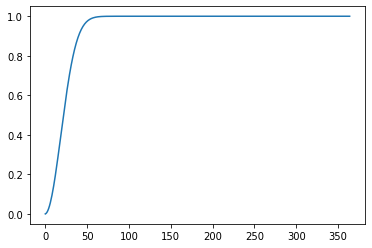

In [5]:
from itertools import accumulate
import matplotlib.pyplot as plt
from operator import mul

num_days = 365

factors = [1 - i / num_days for i in range(num_days)]
prob_no_collision = list(accumulate(factors, mul))
prob_collision = [1 - p for p in prob_no_collision]

plt.plot(prob_collision)
plt.savefig('birthdays.png')

for n in (22, 23, 35, 100):
    print(f'The probability for {n} people '
          f'is {prob_collision[n - 1]}')

### Expectation Is Not All

Alice and Bob play the following game. Each of them has fair, but unconventional dice. The numbers on the sides of Alice's dice are $2, 2, 2, 2, 3, 3$, whereas the numbers on the sides of Bob's dice are $1, 1, 1, 1, 6, 6$.
They throw their dices. The one with the larger number on the dice wins. If Alice and Bob play the game many times, who is likely to win more often?

Let us compute the expectations of the corresponding two random variables.
Alice gets $2$ with probability $2/3$ and gets $3$ with probability $1/3$. Her expectation is 
$$
2 \cdot \frac 23 + 3 \cdot \frac 13 = \frac 73.
$$
Bob gets $1$ with probability $2/3$ and gets $6$ with probability $1/3$. His expected value is 
$$
1 \cdot \frac 23 + 6 \cdot \frac 13 = \frac 83.
$$
Therefore, Bob has better expected value. Does it mean that he wins more often?

Let us compute the probabilities for each player to win directly. 
The result of the game depends only on the outcome of Bob: indeed, 
if he throws $1$, he loses, if he throws $6$, he wins. 
Bob throws $1$ with probability $2/3$. Thus, Bob loses with probability $2/3$. Bob loses more often despite having larger expected value.

The following code snippet simulates the game $100\,000$ times
and shows that, indeed, Alice wins in about $2/3$ of all games.

In [6]:
from random import randint, seed

seed(27)

dice1 = [2, 2, 2, 2, 3, 3]
dice2 = [1, 1, 1, 1, 6, 6]

num_rounds = 10 ** 5
num_dice1_wins = 0

for _ in range(num_rounds):
    dice1_result = dice1[randint(0, 5)]
    dice2_result = dice2[randint(0, 5)]

    if dice1_result > dice2_result:
        num_dice1_wins += 1

print(f'Out of {num_rounds} throws, dice1 won {num_dice1_wins} times')

Out of 100000 throws, dice1 won 66868 times
